In [60]:
from cmath import *
from math import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

In [61]:
# Resistências
R1 = 10
R2 = 10
# Indutâncias
L1 = 1*10**-3
L2 = 1*10**-3

# Capacitâncias
C1 = 1*10**-6
C2 = 1*10**-6

# Frequência
freq = 1/(sqrt(L1*C1))

# Frequência Angular
w = 2 * pi * freq

# Tensão de Pico
t_pico = 1 / w

# Indutância Mútua
k = 0.1
M = k * sqrt(L1 * L2)

# Impedâncias
XL1 = 1j * w * L1
XL2 = 1j * w * L2

XC1 = 1/(1j * w * C1)
XC2 = 1/(1j * w * C2)

XM = 1j * w * M

In [62]:
def CalculaLeonardo(Uf, Rc):
    Z=np.array([
        [R1+XL1+XC1             ,    -XM],
        [-XM, R2+XL2+(Rc/(Rc*1j*w*C2+1))]
                ])
    V=np.array([Uf,
                0])
    i=np.dot(linalg.inv(Z),V)
    return i[0], i[1]

In [63]:

Uf = 10
Rc = 102
k = 0.1

indices: [34, 35, 36, 37, 38, 39, 40, 13755, 13756, 13757, 13758, 13759, 13760, 13761, 13762, 13763, 13764, 13765, 13766, 13767, 13768, 13769, 13770, 13771, 13772, 13773, 13774, 13775, 13776, 13777, 13778, 13779, 13780, 13781, 13782, 13783, 13784, 13785, 13786, 13787, 13788, 13789, 13790, 13791, 13792, 13793, 13794, 13795, 13796, 13797, 13798, 13799, 13800, 13801, 13802, 13803, 13804, 13805, 13806, 13807, 13808, 13809, 13810, 13811, 13812, 13813, 13814, 13815, 13816, 13817, 13818, 13819, 13820, 13821, 13822, 13823, 13824, 13825, 13826, 13827, 13828, 13829, 13830, 13831, 13832, 13833, 13834, 13835, 13836, 13837, 13838, 13839, 13840, 13841, 13842, 13843, 13844, 13845, 13846, 13847, 13848, 13849, 13850, 13851, 13852, 13853, 13854, 13855, 13856, 13857, 13858, 13859, 13860, 13861, 13862, 13863, 13864, 13865, 13866, 13867, 13868, 13869, 13870, 13871, 13872, 13873, 13874, 13875, 13876, 13877, 13878, 13879, 13880, 13881, 13882, 13883, 13884, 13885, 13886, 13887, 13888, 13889, 13890, 13891, 138

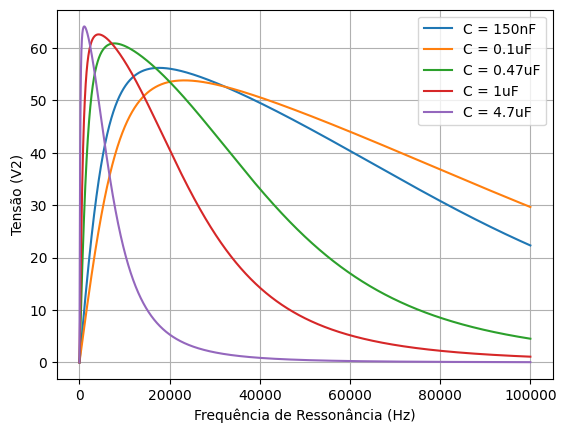

In [64]:
capacitores = [150*10**-9, 0.1*10**-6, 0.47*10**-6, 1*10**-6, 4.7*10**-6]
frequencias = np.arange(1*10**-10,100*10**3,1)

Cs = ['150nF', '0.1uF', '0.47uF', '1uF', '4.7uF']

V2_list = []
L_list = []
f_list = []
indices = []
v2_corr = []

Rdc = 0.5

n = 0

for C in capacitores:
    V2_list = []
    L_list = []
    f_list = []
    indices = []
    v2_corr = []

    n = n + 1
    for f in frequencias:
        
        f_list.append(f)

        C1 = C2 = C

        R = R1 = R2 = Rdc + (2*Rdc/(100*10**3)) * f
        
        w = 2 * pi * f
        L = L1 = L2 = 1/((f**2)*4*(pi**2)*C)

        L_list.append(L)

        XC = XC1 = XC2 = 1/(1j * w * C)
        XL = XL1 = XL2 = 1j * w * L
        
        M = k * sqrt(L**2)
        XM = 1j * w * M

        i1, i2 = CalculaLeonardo(Uf, Rc)

        V2 = ((Rc*XC)/(Rc+XC))*i2
        
        V2_list.append(abs(V2))
    
    for j, valor in enumerate(V2_list):
        if 10 <= valor <= 12:
            indices.append(j)
            v2_corr.append(valor)
    
    if n == 5:
        print(f'indices: {indices}')
        print(f'V2: {v2_corr}')
        print()
        print(f'Capacitor: C{n},\nÍndices: {indices}')
        for i in indices:
            print(f'Tensão: {V2_list[i]}')
            print(f'Indutância: {L_list[i]}')
            print(f'Frequência: {f_list[i]}')
            print()

    plt.plot(frequencias, V2_list, label=f"C = {Cs[n-1]}")
    plt.xlabel("Frequência de Ressonância (Hz)")
    plt.ylabel("Tensão (V2)")
    plt.legend()
    plt.grid()
plt.show()

f = 13700

In [65]:

freq = f = 13700
C = C1 = C2 = 4.7*10**-6
L = L1 = L2 = 2.84e-05
Uf = (2/pi)*7
Rc = 180
R = R1 = R2 = Rdc = 0.3
k = 0.1

In [66]:
Tensão: 11.995933305756028
Indutância: 2.8477045607519828e-05
Frequência: 13757.0000000001

# Lt = 1/((f**2)*4*(pi**2)*C)

w = 2 * pi * f

XC = XC1 = XC2 = 1/(1j * w * C)
XL = XL1 = XL2 = 1j * w * L

M = k * sqrt(L**2)
XM = 1j * w * M

print(XC)
print(XL)
print(XM)

print('---------------')
print(f'L = {L} H')
print(f'R fio = {R} Ohms')
#print(f'f Teste: {1/(2*pi*sqrt(L*C))} Hz')

-2.4717338576160173j
2.4446617393174335j
0.24446617393174333j
---------------
L = 2.84e-05 H
R fio = 0.3 Ohms


In [67]:
i1, i2 = CalculaLeonardo(Uf, Rc)
i1, i2

((9.319227639442865+0.25164277428551446j),
 (-0.7232018973313591+6.764770705036314j))

In [68]:
V2 = ((Rc*XC)/(Rc+XC))*i2
abs(V2)

16.814407653929145

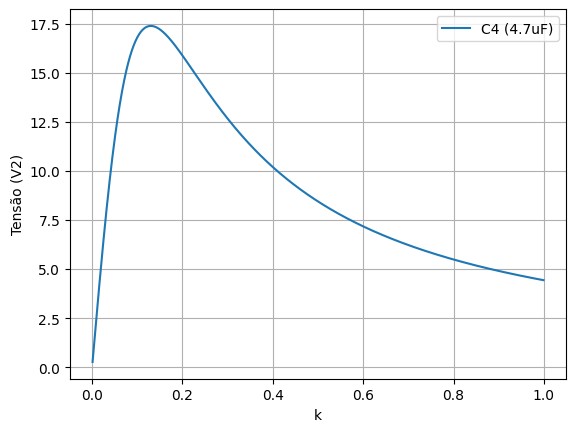

V2_list2: [0.2668171832645622, 0.5335409302667317, 0.800077912184743, 1.0663350148227093, 1.332219445286142, 1.5976388378954305, 1.8625013590880075, 2.126715811063965, 2.3901917339348784, 2.6528395061415213, 2.9145704429129657, 3.175296892547281, 3.4349323303024684, 3.693391449695622, 3.9505902510181707, 4.20644612688575, 4.460877944652417, 4.713806125530699, 4.965152720271141, 5.21484148126761, 5.462797930967616, 5.708949426479995, 5.953225220285775, 6.195556516971537, 6.43587652591808, 6.674120509890878, 6.910225829492149, 7.14413198344786, 7.3757806447159755, 7.605115692415246, 7.832083239586385, 8.056631656809692, 8.278711591714906, 8.49827598443063, 8.715280079031217, 8.929681431049655, 9.141439911134478, 9.350517704938095, 9.556879309332391, 9.760491525055432, 9.961323445900403, 10.159346444564466, 10.354534155281367, 10.546862453366732, 10.736309431809799, 10.922855375049242, 11.106482730074129, 11.287176074993777, 11.464922085222332, 11.63970949742533, 11.811529071376544, 11.98

In [69]:
# freq fixa com K variando

k_list = np.arange(0.001, 1, 0.001)
V2_list2 = []


for k in k_list:
    M = k * sqrt(L**2)
    XM = 1j * w * M
    i1, i2 = CalculaLeonardo(Uf, Rc)
    V2 = ((Rc*XC)/(Rc+XC))*i2
    V2_list2.append(abs(V2))

plt.plot(k_list, V2_list2, label="C4 (4.7uF)")
plt.xlabel("k")
plt.ylabel("Tensão (V2)")
plt.legend()
plt.grid()
plt.show()

#debug

print(f'V2_list2: {V2_list2}')
print(f'L: {L}')
print(f'f: {f}')
print(f'C: {C}')
print(f'Uf: {Uf}')
print(f'Rc: {Rc}')
print(f'R: {R}')
print(f'k: {k}')
print(f'XC: {XC}')
print(f'XL: {XL}')
print(f'XM: {XM}')
print(f'i1: {i1}')
print(f'i2: {i2}')
print(f'V2: {V2}') 




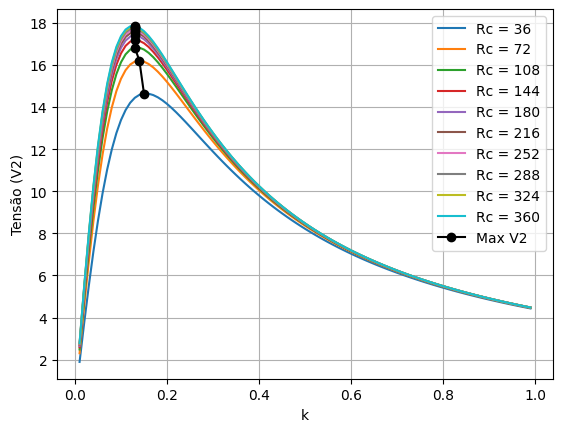

In [70]:
n=0
Rc_list = np.arange(0, 396, 36)
k_list = np.arange(0.01, 1, 0.01)

V2_list3 = []
max_tensions = []


for Rc in Rc_list[1:]:
    V2_list3 = []

    for k in k_list:
        n = n + 1
        M = k * sqrt(L**2)
        XM = 1j * w * M
        i1, i2 = CalculaLeonardo(Uf, Rc)
        V2 = ((Rc*XC)/(Rc+XC))*i2
        V2_list3.append(abs(V2))

    max_index = np.argmax(V2_list3)
    max_k = k_list[max_index]
    max_V2 = V2_list3[max_index]
    max_tensions.append((max_k, max_V2))
    max_k_values, max_V2_values = zip(*max_tensions)

    plt.plot(k_list, V2_list3, label="Rc = " + str(Rc))

plt.plot(max_k_values, max_V2_values, 'o-', label='Max V2', color='black')

plt.xlabel("k")
plt.ylabel("Tensão (V2)")
plt.legend()
plt.grid()
plt.show()

Rc = 180 via calculo

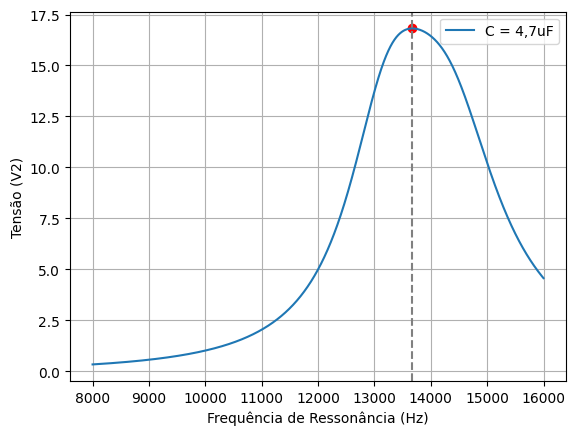

V2_list2: [0.2668171832645622, 0.5335409302667317, 0.800077912184743, 1.0663350148227093, 1.332219445286142, 1.5976388378954305, 1.8625013590880075, 2.126715811063965, 2.3901917339348784, 2.6528395061415213, 2.9145704429129657, 3.175296892547281, 3.4349323303024684, 3.693391449695622, 3.9505902510181707, 4.20644612688575, 4.460877944652417, 4.713806125530699, 4.965152720271141, 5.21484148126761, 5.462797930967616, 5.708949426479995, 5.953225220285775, 6.195556516971537, 6.43587652591808, 6.674120509890878, 6.910225829492149, 7.14413198344786, 7.3757806447159755, 7.605115692415246, 7.832083239586385, 8.056631656809692, 8.278711591714906, 8.49827598443063, 8.715280079031217, 8.929681431049655, 9.141439911134478, 9.350517704938095, 9.556879309332391, 9.760491525055432, 9.961323445900403, 10.159346444564466, 10.354534155281367, 10.546862453366732, 10.736309431809799, 10.922855375049242, 11.106482730074129, 11.287176074993777, 11.464922085222332, 11.63970949742533, 11.811529071376544, 11.98

In [71]:
freq_t = np.arange(8000, 16000, 1)
V2_list4 = []

freq = f = 13700
C = C1 = C2 = 4.7*10**-6
L = L1 = L2 = 2.84e-05
Uf = (2/pi)*7
Rc = 180
R = R1 = R2 = Rdc = 0.3
k = 0.1

for f in freq_t:
    w = 2 * pi * f
    XC = XC1 = XC2 = 1/(1j * w * C)
    XL = XL1 = XL2 = 1j * w * L
    
    M = k * sqrt(L**2)
    XM = 1j * w * M
    i1, i2 = CalculaLeonardo(Uf, Rc)
    V2 = ((Rc*XC)/(Rc+XC))*i2
    
    V2_list4.append(abs(V2))

max_V2 = max(V2_list4)  # Encontra o valor máximo de V2_list4
max_index = V2_list4.index(max_V2)  # Encontra o índice do valor máximo
max_freq = freq_t[max_index]

plt.plot(freq_t, V2_list4, label="C = 4,7uF")
plt.scatter(max_freq, max_V2, color='red')  # Marca o ponto máximo
plt.axvline(x=max_freq, color='gray', linestyle='--')  # Linha vertical no ponto máximo
plt.xlabel("Frequência de Ressonância (Hz)")
plt.ylabel("Tensão (V2)")
plt.legend()
plt.grid()
plt.show()

#debug

print(f'V2_list2: {V2_list2}')
print(f'L: {L}')
print(f'f: {f}')
print(f'C: {C}')
print(f'Uf: {Uf}')
print(f'Rc: {Rc}')
print(f'R: {R}')
print(f'k: {k}')
print(f'XC: {XC}')
print(f'XL: {XL}')
print(f'XM: {XM}')
print(f'i1: {i1}')
print(f'i2: {i2}')
print(f'V2: {V2}') 


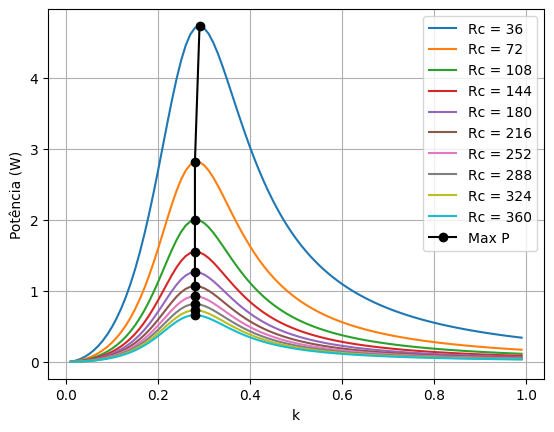

In [72]:
n=0
Rc_list = np.arange(0, 396, 36)
k_list = np.arange(0.01, 1, 0.01)

max_pot = []

for Rc in Rc_list[1:]:
    V2_list5 = []
    P_list = []

    for k in k_list:
        n = n + 1
        M = k * sqrt(L**2)
        XM = 1j * w * M
        i1, i2 = CalculaLeonardo(Uf, Rc)
        V2 = ((Rc*XC)/(Rc+XC))*i2
        V2_list5.append(abs(V2))

        P = ((V2)**2)/Rc
        
        P_list.append(abs(P))

    max_index = np.argmax(P_list)
    max_k = k_list[max_index]
    max_P = P_list[max_index]
    max_pot.append((max_k, max_P))
    max_k_values, max_P_values = zip(*max_pot)

    plt.plot(k_list, P_list, label="Rc = " + str(Rc))

plt.plot(max_k_values, max_P_values, 'o-', label='Max P', color='black')

plt.xlabel("k")
plt.ylabel("Potência (W)")
plt.legend()
plt.grid()
plt.show()